## Linear Regression is technique to predict the future value based 
### In this exercise lets read home prices based on area in sq ft. and then predict some home prices

## Linear Regression Formula
### $y = mx + b$
![Linear regression](img/lin_r.png)

#### Read the File

In [1]:
import pandas as pd
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000
5,5000,823000
6,5500,890000
7,6000,940000
8,6200,970000
9,7000,1000000


#### Lets now plot this on a graph

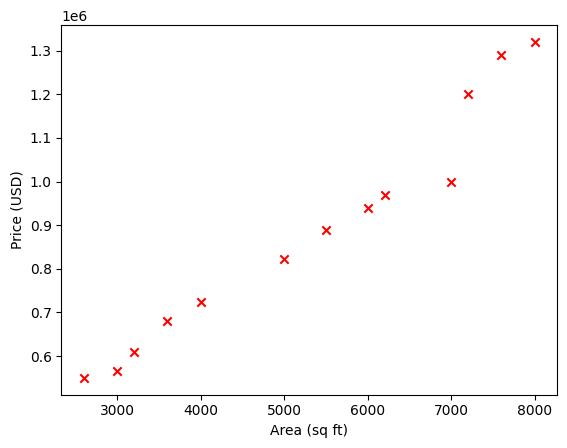

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (USD)")
plt.scatter(df.area, df.price, color="red", marker="x")
plt.show()

#### Now Lets Split data for Train and Test Set

In [3]:
from sklearn.model_selection import train_test_split

## Seperate 80% Train and 20% test
## Here our data has only 1 column to fit feature, but we need 2d Array, so we provide it in 2d array form d[["area"]]
train_feature, tests_feature, train_label, tests_label = train_test_split(df[["area"]], df.price, test_size = 0.2)

#### Now that we have seen the data, lets create Linear regression model

In [4]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

## Fit data to our model
reg.fit(train_feature, train_label.values.ravel())

LinearRegression()

#### Lets See the parameters

Slope: 111.11126887216619, Intercept: 263077.05049931386 



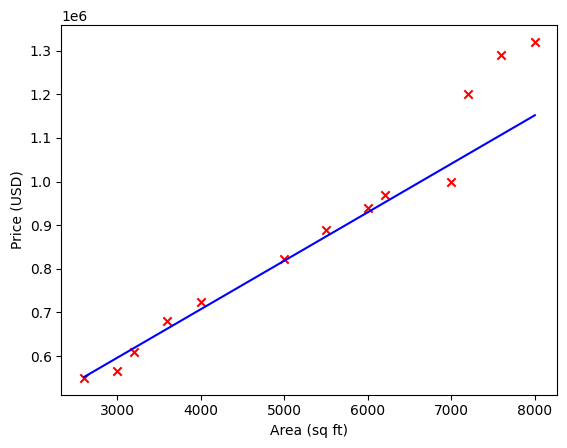

In [5]:
from matplotlib import lines as mlines
from matplotlib import transforms as mtransform

# This is slope for model
m = reg.coef_[0]

# This is Intercept
b = reg.intercept_
print(f"Slope: {m}, Intercept: {b} \n")


line_start_x = df.area.min()
line_start_y = df.area.min()* m + b
line_end_x = df.area.max()
line_end_y = df.area.max() * m + b

plt.xlabel("Area (sq ft)")
plt.ylabel("Price (USD)")
plt.scatter(df.area, df.price, color="red", marker="x")
plt.plot([line_start_x, line_end_x], [line_start_y, line_end_y], color = 'blue')
plt.show()

#### Lets Predict some Values

In [6]:
prediction = reg.predict(tests_feature)
actuals = tests_label.values.ravel()

print(list(zip(prediction, actuals)))

[(1063078.1863789104, 1200000), (1151967.2014766433, 1320000), (1107522.693927777, 1290000)]


### Lets store the model to a file

In [7]:
import joblib
joblib.dump(reg, 'joblib/LinearRegression_Model.pkl')

['joblib/LinearRegression_Model.pkl']

#### For testing, we will load the model to new variable and run prediction using new variable

In [8]:
reg2 = joblib.load('joblib/LinearRegression_Model.pkl')
prediction = reg2.predict(tests_feature)
actuals = tests_label.values.ravel()

print(list(zip(prediction, actuals)))

[(1063078.1863789104, 1200000), (1151967.2014766433, 1320000), (1107522.693927777, 1290000)]
